# Ejercicio 8 - guía 8

Se tiraron 10 monedas y salieron 4 caras. Llamamos 𝜃 la probabilidad de sacar una cara. 
Asumimos un prior 𝑝(𝜃) = Beta(3, 2) para la probabilidad 𝜃 de sacar una cara.

## a)
Obtener la probabilidad posterior 𝑝(𝜃 |𝑦) usando la aproximación de Laplace (aproximando su
logaritmo por una función cuadrática de 𝜃). Graficar y comparar con la distribución exacta.

### Desarrollo

En este caso tenemos que el parámetro 𝜃 que queremos estimar **representa el parámetro p de una binomial**. Y como prior para 𝜃 elegimos **𝑝(𝜃) = Beta(3, 2)**, el cual
es un prior conjugado de la binomial. Todo esto nos deja que la distribución exacta de la posterior es de la forma: 

* **𝑝(𝜃|y) = Beta(7, 8)**

Pero nosotros queremos usar **la aproximación de Laplace**, a continuación dejo una imagen con los cálculos:

![Calculos log posterior](../../imagenes/ejercicio_8_guia8.jpg)

Ahora genero el gráfico comparando la aproximación con la distribución exacta:

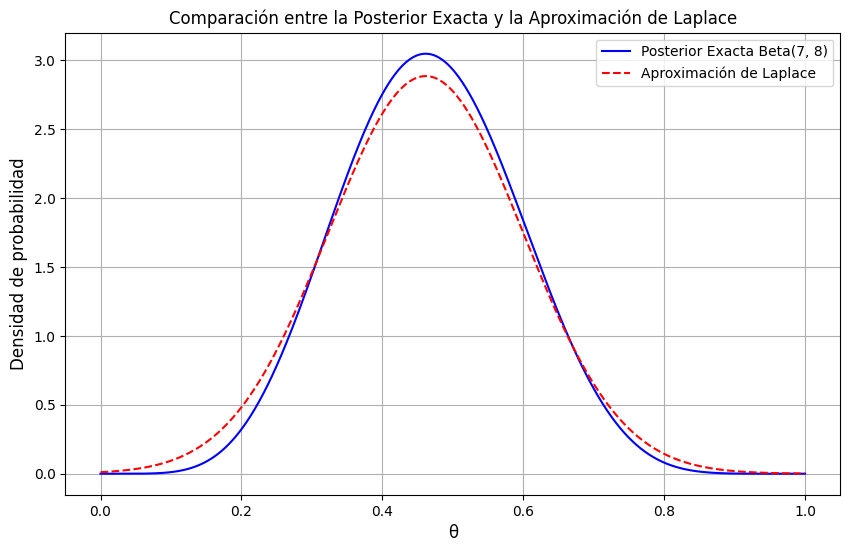

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

# Genero valores para theta
theta = np.linspace(0, 1, 1000)

# Función de densidad de la posterior exacta
posterior_exacta = beta.pdf(theta, 7, 8)

# Aproximacion de laplace
laplace_approx = norm.pdf(theta, 6/13, np.sqrt(42/2197))

# Hago el gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_exacta, label='Posterior Exacta Beta(7, 8)', color='blue')
plt.plot(theta, laplace_approx, label='Aproximación de Laplace', color='red', linestyle='--')
plt.xlabel('θ', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Comparación entre la Posterior Exacta y la Aproximación de Laplace')
plt.legend()
plt.grid()
plt.show()

## b)
Repetir el procedimiento aumentando la cantidad de tiradas (pero dejando constante la proporción de caras). 
Repetir variando la proporción de caras.

### Desarrollo

En este caso considero aumentar la cantidad de tiradas manteniendo la proporción y el prior propuesto, quedándome que:

In [1]:
a_prior = 3
b_prior = 2
n = 100 
y = 40  

Y la posterior exacta me queda de la forma:

In [4]:
a_post = a_prior + y
b_post = b_prior + n - y

posterior_exacta = beta.pdf(theta, a_post, b_post)

Como sé que la distribución de la posterior **es una beta**, no repito los pasos que hice en el primer inciso sino que uso la fórmula para calcular la 
moda y además me aprovecho de la estructura de la segunda derivada que sigue cierto patrón:

In [5]:
theta_hat = (a_prior + y - 1) / (a_post + b_post - 2)
H = -(a_post - 1) / (theta_hat**2) - (b_post - 1) / ((1 - theta_hat)**2)
var_laplace = -1 / H  
laplace_approx = norm.pdf(theta, theta_hat, np.sqrt(var_laplace))

Y ahora ploteo el gráfico:

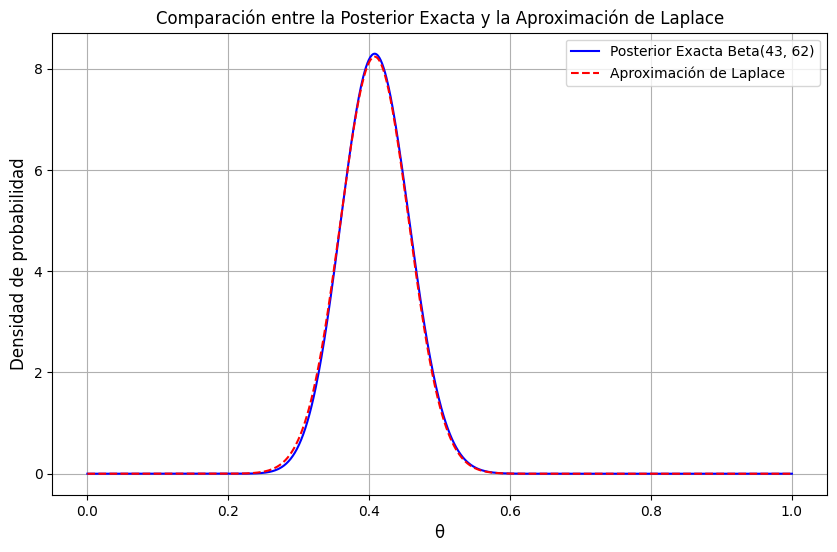

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_exacta, label=f'Posterior Exacta Beta({a_post}, {b_post})', color='blue')
plt.plot(theta, laplace_approx, label='Aproximación de Laplace', color='red', linestyle='--')
plt.xlabel('θ', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Comparación entre la Posterior Exacta y la Aproximación de Laplace')
plt.legend()
plt.grid()
plt.show()

Podemos ver que la aproximación es **casi exacta** (por no decir exacta).

Ahora paso a repetir el procedimiento en un solo cuadro de código pero para otra proporción de caras:

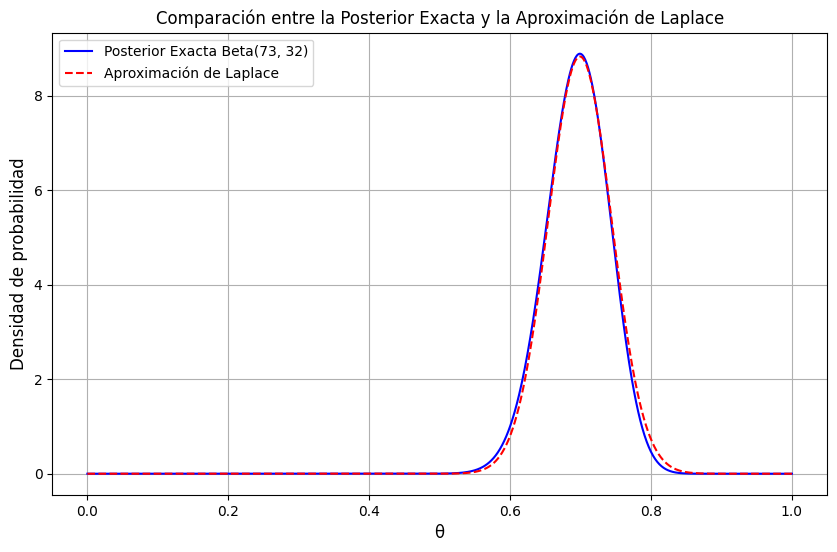

In [7]:
# Nueva proporción
n = 100
y = 70

# Nueva posterior
a_post = a_prior + y
b_post = b_prior + n - y
posterior_exacta = beta.pdf(theta, a_post, b_post)

# Aproximo por laplace
theta_hat = (a_prior + y - 1) / (a_post + b_post - 2)  # Estimación de MAP
H = -(a_post - 1) / (theta_hat**2) - (b_post - 1) / ((1 - theta_hat)**2)  # Segunda derivada de la log-posterior
var_laplace = -1 / H  # Varianza de la aproximación de Laplace
laplace_approx = norm.pdf(theta, theta_hat, np.sqrt(var_laplace))

# El Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_exacta, label=f'Posterior Exacta Beta({a_post}, {b_post})', color='blue')
plt.plot(theta, laplace_approx, label='Aproximación de Laplace', color='red', linestyle='--')
plt.xlabel('θ', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Comparación entre la Posterior Exacta y la Aproximación de Laplace')
plt.legend()
plt.grid()
plt.show()

Se puede ver que sigue siendo una apróximación **bastante exacta**, pero no tanto como la anterior.

## c)
Comparar la aproximación obtenida con la aproximación normal de momentos para varios
casos del inciso anterior. ¿En qué casos conviene usar la aproximación cuadrática?

### Desarrollo

Para esto tomo el primer caso del inciso anterior en donde mantuvimos la proporción pero aumentamos la cantidad de tiradas. Paso a realizar el gráfico
haciendo uso de la aproximación por momentos:

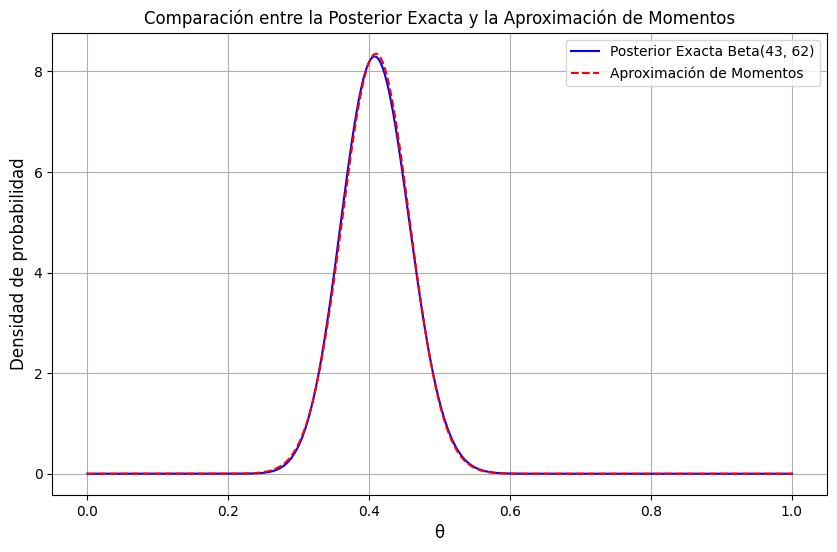

In [8]:
n = 100
y = 40

# Nueva posterior
a_post = a_prior + y
b_post = b_prior + n - y
posterior_exacta = beta.pdf(theta, a_post, b_post)

# Aproximo por momentos
momentos_aprox = norm.pdf(theta, a_post / (a_post + b_post), np.sqrt((a_post * b_post) / ((a_post + b_post)**2 * (a_post + b_post + 1))))

# El Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_exacta, label=f'Posterior Exacta Beta({a_post}, {b_post})', color='blue')
plt.plot(theta, momentos_aprox, label='Aproximación de Momentos', color='red', linestyle='--')
plt.xlabel('θ', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Comparación entre la Posterior Exacta y la Aproximación de Momentos')
plt.legend()
plt.grid()
plt.show()

En este caso la aproximación de momentos **también dió bastante similar**.

En cuanto a que método de aproximación usar en cada caso depende de los recursos y de la información que podamos controlar de la 
distribución posterior, normalmente es mejor usar la aproximación cuadrática ya que al hacer cálculo de la moda y no de la media 
logra que este sea más fácil y eficiente, pero siempre depenede de cada caso.